In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import vizualization as viz

import config
import getdata as gd
from modeling_main import get_one_model, get_multiple_models

import warnings
warnings.filterwarnings('ignore')

## Comparision between various Trend Labeling methods

#### Metrics for modeling one ticker

In [2]:
methods = ['trend_labeling', 'exp_ma', 'sim_ma']

clfs = {}
model_metrics_df = pd.DataFrame()

for method in methods:
    clf, model_metrics = get_one_model('GLP', method=method)
    clfs[method] = clf
    model_metrics_df = pd.concat([model_metrics_df, model_metrics], ignore_index=True)

In [3]:
model_metrics_tbl = model_metrics_df.drop(['symbol', 'type', 'best_model', 'performed_on', 
                                           'event_st_date', 'event_en_date', 
                                           'rawdata_st_date', 'rawdata_en_date',	
                                           'SPY_st_date', 'SPY_en_date',
                                           ]
                                           , axis=1)

In [4]:
model_metrics_tbl

,best_cross_val_score,recall,precision,accuracy,run_time,train_test,cum_rtn,annualized_rtn,sharpe_ratio,method
0,0.112857,0.154865,0.102435,0.532027,0.439363,Train,0.000000,0.000000,0.00,trend_labeling
1,0.033579,0.030357,0.037567,0.326744,0.008997,Test,0.014088,0.018605,-0.06,trend_labeling
2,0.241660,0.204829,0.339672,0.744782,0.145706,Train,0.000000,0.000000,0.00,exp_ma
3,0.000000,0.000000,0.000000,0.453807,0.009001,Test,-0.105309,-0.136385,-0.97,exp_ma
4,0.189695,0.152502,0.259536,0.719774,0.143770,Train,0.000000,0.000000,0.00,sim_ma
5,0.160129,0.089465,0.762010,0.639671,0.008004,Test,0.401006,0.559418,1.78,sim_ma


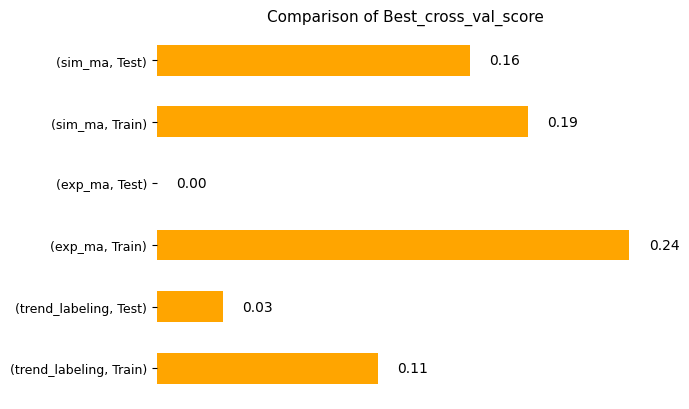

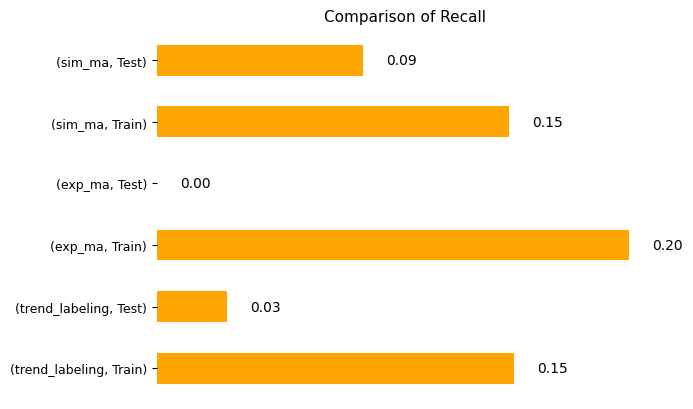

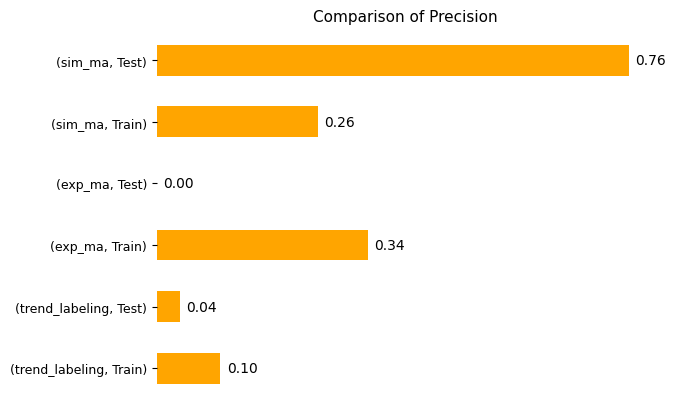

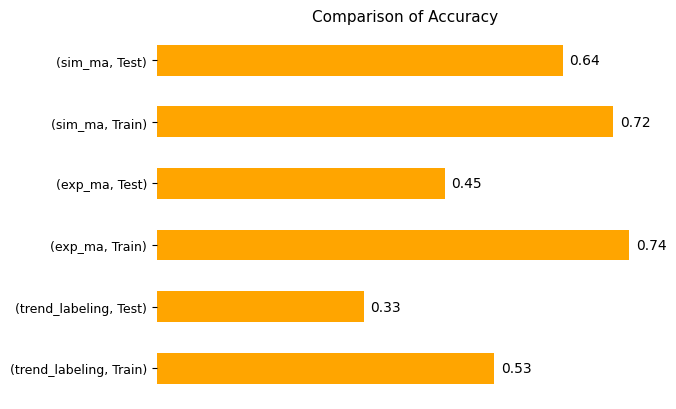

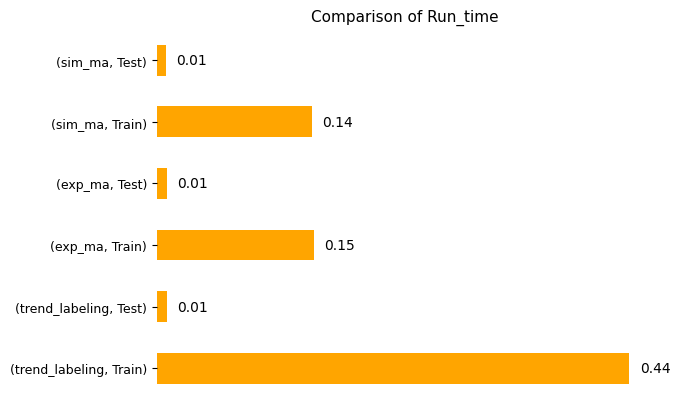

In [5]:
model_metrics_tbl_temp = model_metrics_tbl.set_index(['method', 'train_test'])

viz.plot_model_metrics(model_metrics_tbl_temp[['best_cross_val_score','recall','precision','accuracy','run_time']])


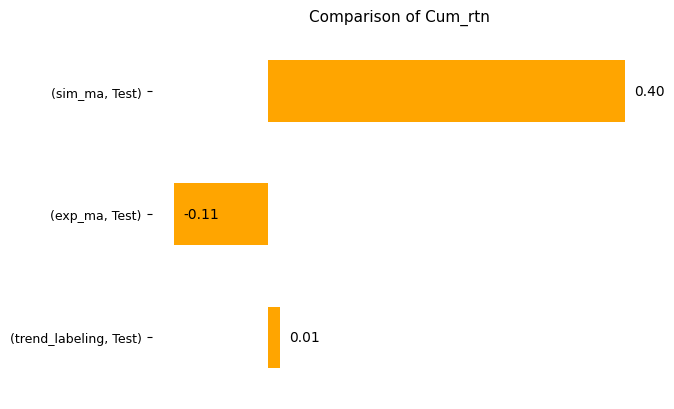

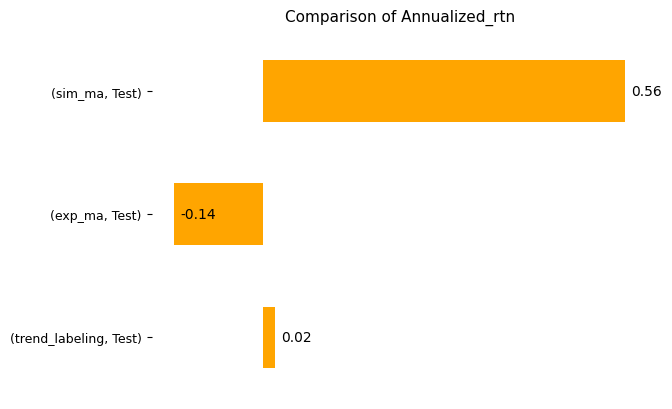

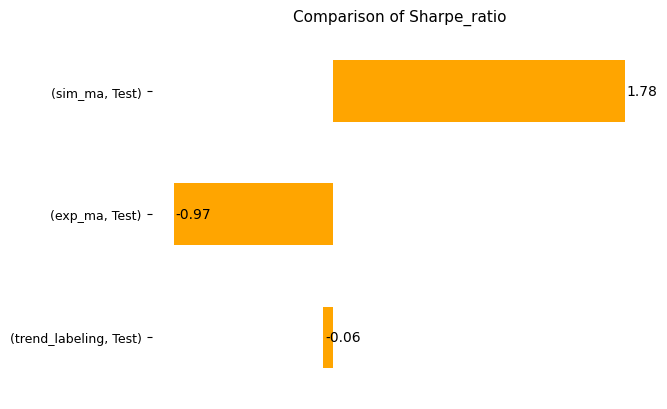

In [6]:
viz.plot_model_metrics(model_metrics_tbl_temp.loc[pd.IndexSlice[:, 'Test'], ['cum_rtn','annualized_rtn','sharpe_ratio']])

#### Metrics for list of tickers models

In [7]:
pgConnStr = gd.pgDictToConn(config.pgSecrets)

lowest_price = 30
highest_price = 40

tickerlst = gd.getFilteredTickerList_Daily(lowest_price=lowest_price, highest_price=highest_price)
print('There are {} tickers between ${} and ${}'.format(len(tickerlst), lowest_price, highest_price))

There are 20 tickers between $30 and $40


In [8]:
clfs = ['random_forest', 
        'standard_bagging_decision_tree', 
        'sequential_bootstrapping_decision_tree',
        'SVC',
        'sequential_bootstrapping_SVC'
        ]

basket_clfs = {}
basket_model_metrics_df = pd.DataFrame()


for method in methods:
    for c in clfs:
        clf, model_metrics = get_multiple_models(tickerlst,type=c, method=method)
        basket_clfs[method] = clf
        basket_model_metrics_df = pd.concat([basket_model_metrics_df, model_metrics], ignore_index=True)

Processing 1/20 AQNU...
Modeling completed 1/20 AQNU
Processing 2/20 ATEX...
Modeling completed 2/20 ATEX
Processing 3/20 AVID...
Modeling completed 3/20 AVID
Processing 4/20 AVNS...
Modeling completed 4/20 AVNS
Processing 5/20 BROS...
Modeling completed 5/20 BROS
Processing 6/20 CIR...
Modeling completed 6/20 CIR
Processing 7/20 CPSI...
Modeling completed 7/20 CPSI
Processing 8/20 CRTO...
Modeling completed 8/20 CRTO
Processing 9/20 DMLP...
Modeling completed 9/20 DMLP
Processing 10/20 EGRX...
Modeling completed 10/20 EGRX
Processing 11/20 FDP...
Modeling completed 11/20 FDP
Processing 12/20 FSBW...
Modeling completed 12/20 FSBW
Processing 13/20 GLP...
Modeling completed 13/20 GLP
Processing 14/20 GPRE...
Modeling completed 14/20 GPRE
Processing 15/20 KYMR...
Modeling completed 15/20 KYMR
Processing 16/20 PRCT...
Modeling completed 16/20 PRCT
Processing 17/20 RNST...
Modeling completed 17/20 RNST
Processing 18/20 TYG...
Modeling completed 18/20 TYG
Processing 19/20 VCEL...
Modeling co

OperationalError: connection failed: SSL connection has been closed unexpectedly

In [9]:
basket_model_metrics_tbl = basket_model_metrics_df.drop([ 'best_model', 'performed_on', 
                                           'event_st_date', 'event_en_date', 
                                           'rawdata_st_date', 'rawdata_en_date',	
                                           'SPY_st_date', 'SPY_en_date',
                                           ]
                                           , axis=1).dropna()

In [10]:
basket_model_metrics_tbl = basket_model_metrics_tbl.groupby(['type','method', 'train_test'])\
    .agg({'best_cross_val_score': 'mean', 
          'recall': 'mean', 
          'precision': 'mean', 
          'accuracy': 'mean', 
          'run_time': 'mean', 
          'cum_rtn':'mean',
          'annualized_rtn':'mean',
          'sharpe_ratio':'mean',
          'symbol': pd.Series.nunique})

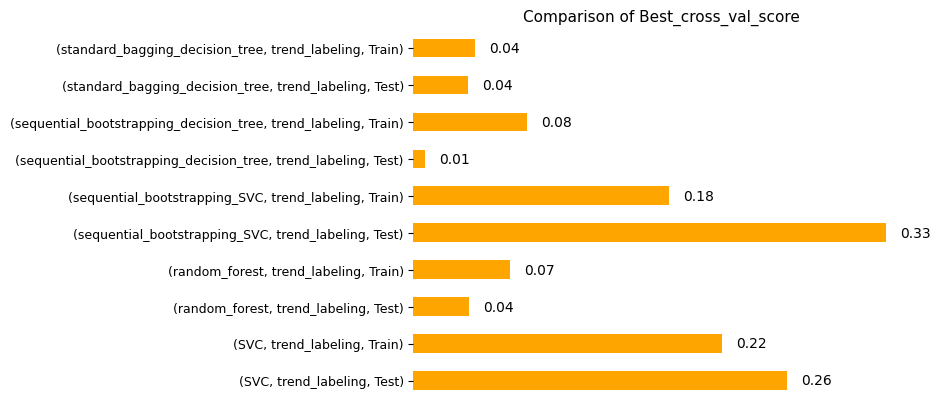

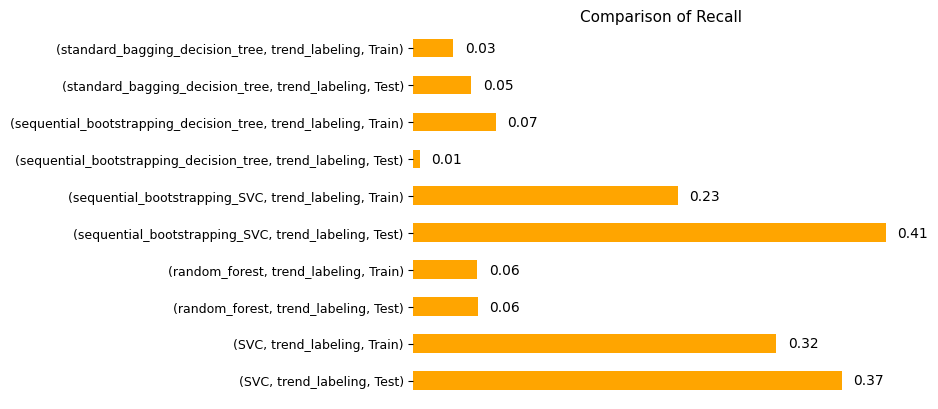

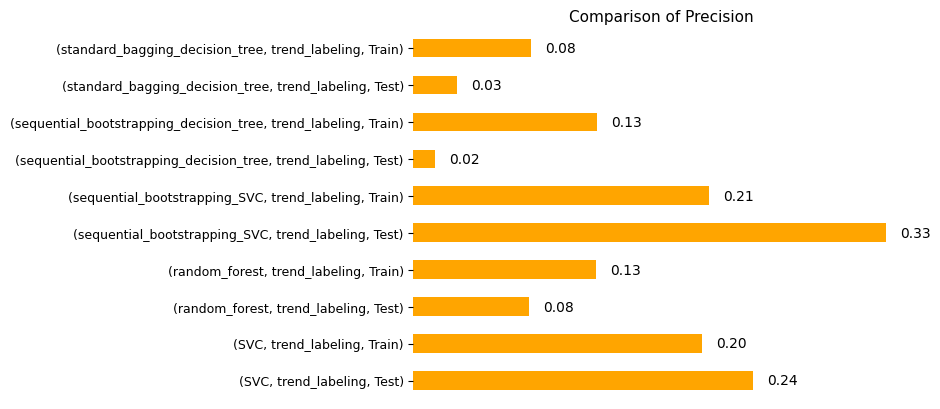

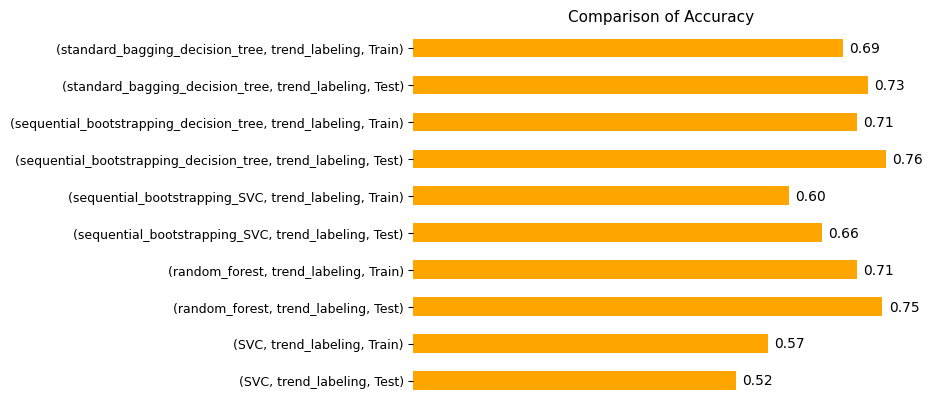

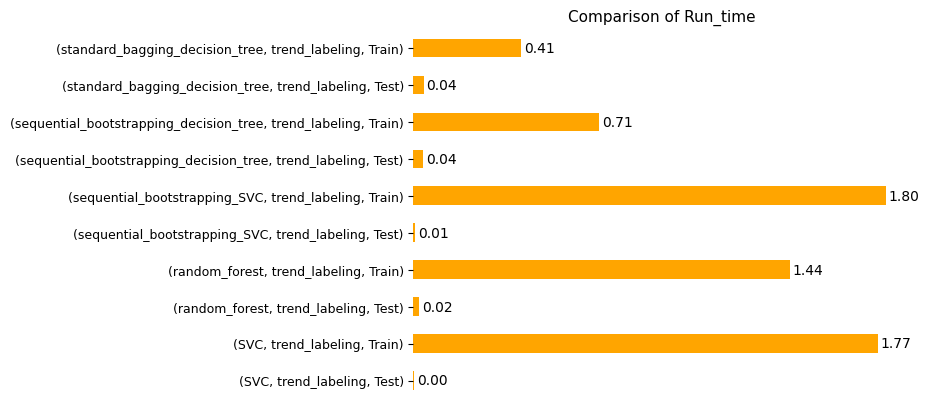

In [11]:
viz.plot_model_metrics(basket_model_metrics_tbl[['best_cross_val_score','recall','precision','accuracy','run_time']])

In [12]:
viz.plot_model_metrics(basket_model_metrics_tbl.loc[pd.IndexSlice[:, 'Test'], ['cum_rtn','annualized_rtn','sharpe_ratio']])

KeyError: 'Test'

In [13]:
basket_model_metrics_tbl

best_cross_val_score  \
type                                   method         train_test                         
SVC                                    trend_labeling Test                    0.261670   
                                                      Train                   0.216072   
random_forest                          trend_labeling Test                    0.038870   
                                                      Train                   0.067659   
sequential_bootstrapping_SVC           trend_labeling Test                    0.331024   
                                                      Train                   0.178952   
sequential_bootstrapping_decision_tree trend_labeling Test                    0.007829   
                                                      Train                   0.079610   
standard_bagging_decision_tree         trend_labeling Test                    0.037913   
                                                      Train                   0.043069   

                                                                    recall  \
type                                   method         train_test             
SVC                                    trend_labeling Test        0.371935   
                                                      Train       0.315231   
random_forest                          trend_labeling Test        0.055681   
                                                      Train       0.055488   
sequential_bootstrapping_SVC           trend_labeling Test        0.410275   
                                                      Train       0.229762   
sequential_bootstrapping_decision_tree trend_labeling Test        0.005244   
                                                      Train       0.071561   
standard_bagging_decision_tree         trend_labeling Test        0.050120   
                                                      Train       0.034545   

                                                                  precision  \
type                                   method         train_test              
SVC                                    trend_labeling Test         0.239342   
                                                      Train        0.203882   
random_forest                          trend_labeling Test         0.081819   
                                                      Train        0.128931   
sequential_bootstrapping_SVC           trend_labeling Test         0.333293   
                                                      Train        0.208644   
sequential_bootstrapping_decision_tree trend_labeling Test         0.015440   
                                                      Train        0.129429   
standard_bagging_decision_tree         trend_labeling Test         0.030488   
                                                      Train        0.082607   

                                                                  accuracy  \
type                                   method         train_test             
SVC                                    trend_labeling Test        0.519227   
                                                      Train       0.570721   
random_forest                          trend_labeling Test        0.754242   
                                                      Train       0.713410   
sequential_bootstrapping_SVC           trend_labeling Test        0.656577   
                                                      Train       0.603916   
sequential_bootstrapping_decision_tree trend_labeling Test        0.759638   
                                                      Train       0.713233   
standard_bagging_decision_tree         trend_labeling Test        0.731508   
                                                      Train       0.690896   

                                                                  run_time  \
type                                   method         train_test             
SVC   